In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from sklearn.metrics import mean_squared_error

<ipython-input-30-c73e25a21442>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [31]:
transaction_data = pd.read_csv('../../Chengdu80/dataset/transaction_data.tsv', sep='\t')

In [32]:
stocks = {}
for ticker in transaction_data['TICKER'].unique():
    stocks[ticker] = transaction_data[transaction_data['TICKER'] == ticker]

In [83]:
fb_data = pd.read_csv('../../Chengdu80/dataset/FB.csv')
fb_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-28,187.199997,189.529999,185.080002,189.399994,189.399994,13657900
1,2019-10-29,191.690002,192.529999,188.470001,189.309998,189.309998,13574900
2,2019-10-30,189.559998,190.449997,185.979996,188.250000,188.250000,28734600
3,2019-10-31,196.699997,198.089996,188.250000,191.649994,191.649994,42286500
4,2019-11-01,192.850006,194.110001,189.910004,193.619995,193.619995,21711800
...,...,...,...,...,...,...,...
247,2020-10-20,263.059998,269.700012,262.880005,267.559998,267.559998,18763200
248,2020-10-21,279.559998,283.049988,276.369995,278.730011,278.730011,28998600
249,2020-10-22,279.869995,282.450012,275.040009,278.119995,278.119995,16720000
250,2020-10-23,278.799988,285.239990,276.820007,284.790009,284.790009,17490700


In [105]:
def get_arima_prediction(ticker, future_observations_count = 10):
    df = stocks[ticker]
    
    df_train = df['PRC'].values[:df.shape[0] - future_observations_count]
    df_test = df['PRC'].values[df.shape[0] - future_observations_count:]
    
    history = [x for x in df_train]
    model_predictions = []
    
    for time_point in range(future_observations_count):
        model = ARIMA(history, order=(7,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        y_hat = output[0]
        model_predictions.append(y_hat)
        history.append(y_hat)
    
    plt.plot([i for i in range(df.shape[0])], list(df_train) + model_predictions, color='blue')
    plt.plot([i for i in range(df.shape[0])], list(df_train) + list(df_test), color='green')
    plt.title(f'{ticker} Prices Prediction')
    plt.xlabel('Date')
    plt.ylabel('Prices')
    plt.show()

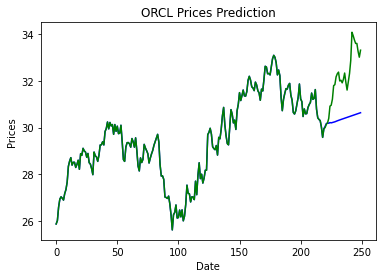

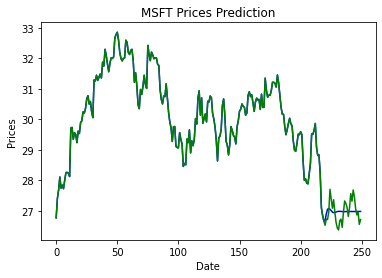

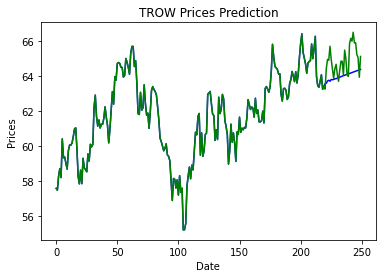

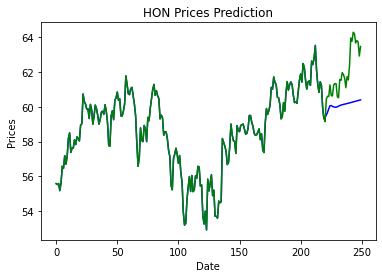

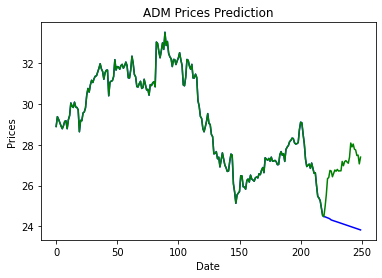

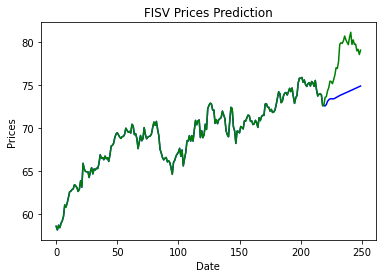

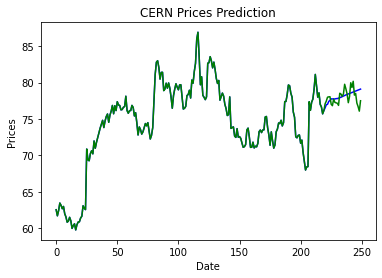

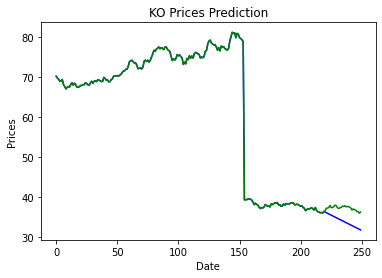

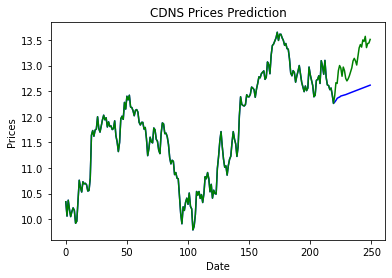

KeyboardInterrupt: 

In [107]:
for ticker in stocks.keys():
    get_arima_prediction(ticker, 30)